## Exercise in logistic regression to classify whether someone experienced heart failure or not

To note:
- This is a small data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
hf_dat = pd.read_csv('heart_failure_clinical_records_dataset.csv')
hf_dat.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [3]:
avg_by_hf = hf_dat.groupby('DEATH_EVENT').mean().reset_index()
avg_by_hf

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [4]:
#check for missing vals
hf_dat.isnull().sum() #nice, no missing data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## EDA

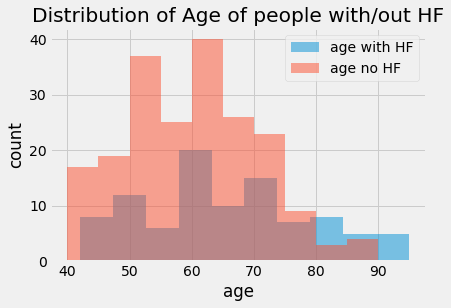

In [5]:
#plot age distributions of those with and without heart failure
plt.hist(hf_dat[hf_dat["DEATH_EVENT"]==1]['age'], bins=10, alpha=.5, label='age with HF')
plt.hist(hf_dat[hf_dat["DEATH_EVENT"]==0]['age'], bins=10, alpha=.5, label='age no HF')
plt.legend(loc='upper right')
plt.xlabel("age")
plt.ylabel("count")
plt.title("Distribution of Age of people with/out HF")
plt.savefig('plots/age_dist', bbox_inches='tight')

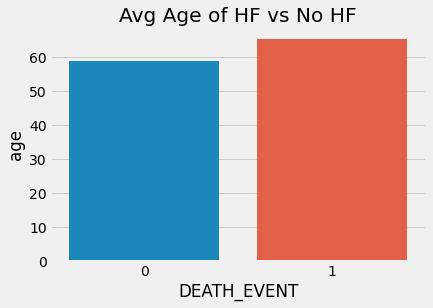

In [6]:
bar = sns.barplot(x=avg_by_hf['DEATH_EVENT'], y=avg_by_hf['age']).set_title('Avg Age of HF vs No HF')
bar.figure.savefig('plots/avg_age')

In [7]:
#define plotting fxn to quickly generate comparative histograms of non-categorical vars
def dist_plotter(df, target_var ,var):
    temp_df1 = df[df[target_var]==1][var]
    temp_df2 = df[df[target_var]==0][var]
    plot1 = plt.hist(temp_df1, alpha=.5, bins = 10, label= var + " " +"with HF")
    plot2 = plt.hist(temp_df2, alpha=.5, bins=10, label= var +" " + "without HF")
    plt.title("Distribution of" + " " + var+ " "+ "in people with/out HF")
    plt.xlabel(var)
    plt.ylabel("proportion (%)")
    plt.legend(loc='upper right')
    plt.savefig('plots/' + var, bbox_inches='tight')
    return plot1, plot2
        

((array([ 8., 12.,  6., 20., 10., 15.,  7.,  8.,  5.,  5.]),
  array([42. , 47.3, 52.6, 57.9, 63.2, 68.5, 73.8, 79.1, 84.4, 89.7, 95. ]),
  <a list of 10 Patch objects>),
 (array([17., 19., 37., 25., 40., 26., 23.,  9.,  3.,  4.]),
  array([40., 45., 50., 55., 60., 65., 70., 75., 80., 85., 90.]),
  <a list of 10 Patch objects>))

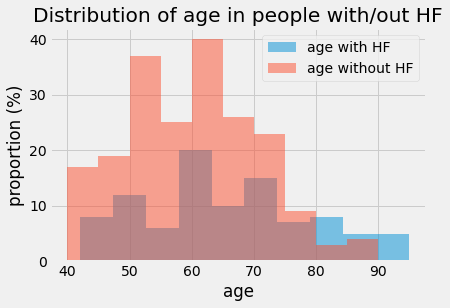

In [8]:
dist_plotter(hf_dat, 'DEATH_EVENT', 'age')

((array([ 1.,  1.,  1.,  3.,  6., 13., 34., 19., 12.,  6.]),
  array([116., 119., 122., 125., 128., 131., 134., 137., 140., 143., 146.]),
  <a list of 10 Patch objects>),
 (array([ 1.,  0.,  0.,  2.,  7., 16., 85., 61., 24.,  7.]),
  array([113. , 116.5, 120. , 123.5, 127. , 130.5, 134. , 137.5, 141. ,
         144.5, 148. ]),
  <a list of 10 Patch objects>))

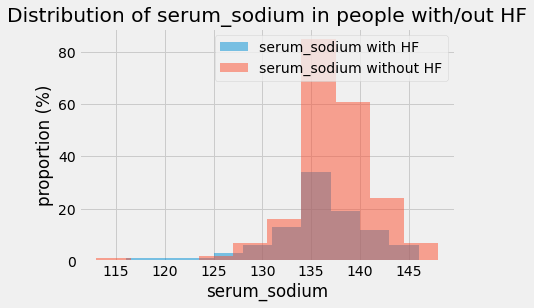

In [9]:
dist_plotter(hf_dat, 'DEATH_EVENT', 'serum_sodium')

((array([28., 22., 13.,  8.,  5.,  4.,  3.,  7.,  4.,  2.]),
  array([  4. ,  27.7,  51.4,  75.1,  98.8, 122.5, 146.2, 169.9, 193.6,
         217.3, 241. ]),
  <a list of 10 Patch objects>),
 (array([ 6.,  4., 37., 39., 15.,  5., 26., 33., 30.,  8.]),
  array([ 12. ,  39.3,  66.6,  93.9, 121.2, 148.5, 175.8, 203.1, 230.4,
         257.7, 285. ]),
  <a list of 10 Patch objects>))

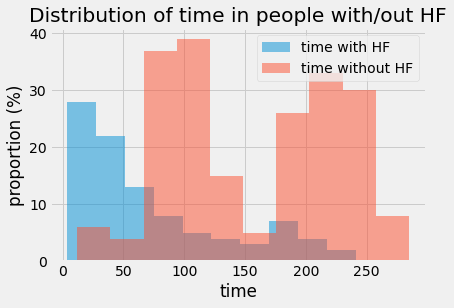

In [10]:
dist_plotter(hf_dat, 'DEATH_EVENT', 'time')

Noticing these variables have visually differing distributions among those who experienced heart failure and those that did not. This tells me I should include these features in modeling HF.

### Categorical Variables

In [11]:
hf_cats = hf_dat.loc[:, ['anaemia','diabetes','high_blood_pressure', 'smoking', 'DEATH_EVENT']]
hf_cats

,anaemia,diabetes,high_blood_pressure,smoking,DEATH_EVENT
0,0,0,1,0,1
1,0,0,0,0,1
2,0,0,0,1,1
3,1,0,0,0,1
4,1,1,0,0,1
...,...,...,...,...,...
294,0,1,1,1,0
295,0,0,0,0,0
296,0,1,0,0,0
297,0,0,0,1,0


In [12]:
#gives number of incidents with 1 in each category
hfcat_grouped = hf_cats.groupby('DEATH_EVENT').sum()
hfcat_grouped

,anaemia,diabetes,high_blood_pressure,smoking
DEATH_EVENT,,,,
0,83,85,66,66
1,46,40,39,30


# Modeling

### Feature engineering 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

In [14]:
#split into feature amtrix and targets
hf_dat_X, hf_dat_y = hf_dat.iloc[:,:-1], hf_dat.iloc[:,-1]

In [15]:
#feature mapping to increase complexity of model
#scaling values to avoid convergence failure
#poly = PolynomialFeatures(2, interaction_only=True)
#hf_feature_mapped = poly.fit_transform(hf_dat_X)
#scaler = preprocessing.StandardScaler().fit(hf_feature_mapped)
#X_scaled = scaler.transform(hf_feature_mapped)

In [16]:
#split into training and train and test
scaler = preprocessing.StandardScaler().fit(hf_dat_X)
Xscale2 = scaler.transform(hf_dat_X)
X_train, X_test, y_train, y_test = train_test_split(Xscale2, hf_dat_y, test_size=.2, random_state=42)

#### Let's fit this data to a model

## Fitting 

In [17]:
model = LogisticRegression(class_weight='balanced')
model

LogisticRegression(class_weight='balanced')

In [18]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
#evaluating score of model on train data
training_accuracy = model.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.8326359832635983


In [21]:
model.score(X_train, y_train)

0.8326359832635983

In [22]:
model.score(X_test, y_test)

0.8

In [23]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Gridsearch

In [24]:
from sklearn.model_selection import GridSearchCV
grid = {"C":np.arange(1,11,1), 'class_weight':[None, 'balanced']}
log = LogisticRegression(max_iter=1000)
log_cv = GridSearchCV(log, grid, cv=10)

In [25]:
log_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'class_weight': [None, 'balanced']})

In [26]:
log_cv.best_params_, log_cv.best_score_

({'C': 1, 'class_weight': None}, 0.836413043478261)

In [27]:
log2 = LogisticRegression(C=1)
log2.fit(X_train, y_train)

LogisticRegression(C=1)

In [28]:
log2.score(X_train, y_train)

0.8702928870292888

In [29]:
log2.score(X_test, y_test)

0.8

In [30]:
from sklearn.metrics import plot_roc_curve

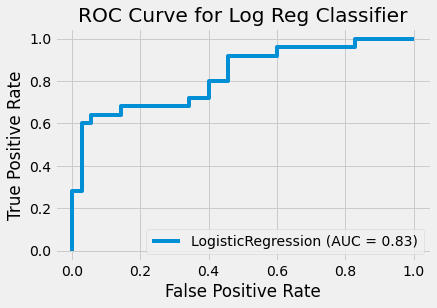

In [31]:
plot_roc_curve(log2, X_test, y_test)
plt.title("ROC Curve for Log Reg Classifier")
plt.show()


Things to do:
- scale your features (done)
- look into class_weights argument for LogisticRegression model (done, tried messing with during gridsearch)
- cross validation
- tune hyper parameters

## Look at model coefficients

In [32]:
log2.coef_

array([[ 0.65507409, -0.05186975,  0.11308038,  0.16429074, -0.88873582,
        -0.06109334, -0.17603203,  0.72782612, -0.25960566, -0.36099791,
         0.07109349, -1.63825961]])

In [33]:
hf_dat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


looks like smaller weights correspond to categorical variables. Let's drop

In [34]:
hf_modified = hf_dat.drop(['anaemia', 'high_blood_pressure'], axis=1)
hf_mod_X, hf_mod_y = hf_modified.iloc[:,:-1], hf_modified.iloc[:,-1]
scaler = preprocessing.StandardScaler().fit(hf_mod_X)
Xscale3 = scaler.transform(hf_mod_X)
X3_train, X3_test, y3_train, y3_test = train_test_split(Xscale3, hf_mod_y, test_size=.2, random_state=42)

In [35]:
hf_modified.head()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,582,0,20,265000.00,1.9,130,1,0,4,1
1,55.0,7861,0,38,263358.03,1.1,136,1,0,6,1
2,65.0,146,0,20,162000.00,1.3,129,1,1,7,1
3,50.0,111,0,20,210000.00,1.9,137,1,0,7,1
4,65.0,160,1,20,327000.00,2.7,116,0,0,8,1


In [36]:
log3 = LogisticRegression()
log3.fit(X3_train, y3_train)
log3.coef_

array([[ 0.65756389,  0.13043459,  0.16756276, -0.89081155, -0.18051801,
         0.72858786, -0.26379907, -0.35254881,  0.07981804, -1.61480892]])

In [37]:
log3.score(X3_train, y3_train)

0.8702928870292888

In [38]:
log3.score(X3_test, y3_test)

0.8166666666666667

And we see a slight improvement 

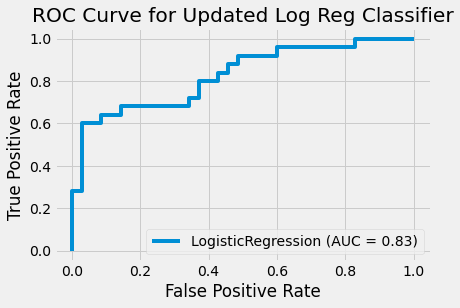

In [39]:
plot_roc_curve(log3, X3_test, y3_test)
plt.title("ROC Curve for Updated Log Reg Classifier")
plt.savefig('plots/ROC', bbox_inches='tight')